In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get data
path = "/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv"
df = pd.read_csv(path)

In [ ]:
# Call dataframe
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
# Seeing empty values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Change the gender column to categorical, with 0 for male and 1 for female
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


### **Regression Analyst**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Create X and y variable
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['Spending Score (1-100)']

In [ ]:
# Create and fit model
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
# Calculate R-Squared (coefficient of determination), Intercept, and Coefficients
r_sq = regressor.score(X, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {regressor.intercept_}")
print(f"coefficients: {regressor.coef_}")

coefficient of determination: 0.10860622655322894
intercept: 73.93003357772214
coefficients: [-2.01323375 -0.60037104  0.0079294 ]


In [ ]:
# Calculate residuals (difference between actual values and prediction values)
residuals = y - regressor.predict(X)

# Use Z-score for outlier identification
z_scores = (residuals - residuals.mean()) / residuals.std()
outliers_index = z_scores[abs(z_scores) > 2].index

outliers_index

Int64Index([2, 134, 138, 156, 158, 162], dtype='int64')

In [ ]:
# Remove ouliers from training data
X_cleaned = X.drop(outliers_index)
y_cleaned = y.drop(outliers_index)

# Fit model with new training data
regressor.fit(X_cleaned, y_cleaned)

LinearRegression()

In [ ]:
# Calculate R-Squared, Intercept, and Coefficients again
r_sq = regressor.score(X_cleaned, y_cleaned)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {regressor.intercept_}")
print(f"coefficients: {regressor.coef_}")

coefficient of determination: 0.166065732720295
intercept: 80.11946177305691
coefficients: [ 1.86089732 -0.77262846  0.03031964]


In [ ]:
# Calculate residuals (selisih between actual values and preediction values)
residuals = y_cleaned - regressor.predict(X_cleaned)

# Use Z-score for outlier identification
z_scores = (residuals - residuals.mean()) / residuals.std()
outliers_index = z_scores[abs(z_scores) > 2].index

outliers_index

Int64Index([6, 11, 144, 172, 192], dtype='int64')

In [ ]:
# Remove ouliers from training data
X_cleaned2 = X_cleaned.drop(outliers_index)
y_cleaned2 = y_cleaned.drop(outliers_index)

# Fit model with new training data
regressor.fit(X_cleaned2, y_cleaned2)

LinearRegression()

In [ ]:
# Calculate R-Squared, Intercept, and Coefficients again
r_sq = regressor.score(X_cleaned2, y_cleaned2)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {regressor.intercept_}")
print(f"coefficients: {regressor.coef_}")

coefficient of determination: 0.2035368223188435
intercept: 78.28776128468371
coefficients: [ 2.87249195 -0.7746481   0.05504164]


In [ ]:
# Calculate residuals (selisih between actual values and preediction values)
residuals = y_cleaned2 - regressor.predict(X_cleaned2)

# Use Z-score for outlier identification
z_scores = (residuals - residuals.mean()) / residuals.std()
outliers_index = z_scores[abs(z_scores) > 2].index

outliers_index

Int64Index([19, 198], dtype='int64')

In [ ]:
# Remove ouliers from training data
X_cleaned3 = X_cleaned2.drop(outliers_index)
y_cleaned3 = y_cleaned2.drop(outliers_index)

# Fit model with new training data
regressor.fit(X_cleaned3, y_cleaned3)

LinearRegression()

In [ ]:
# Calculate R-Squared, Intercept, and Coefficients again (fix)
r_sq = regressor.score(X_cleaned3, y_cleaned3)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {regressor.intercept_}")
print(f"coefficients: {regressor.coef_}")

coefficient of determination: 0.22097018574843463
intercept: 75.45869711082925
coefficients: [ 3.96392335 -0.78215421  0.09941211]


### **Predict Response**

In [ ]:
# Predict response
y_pred = regressor.predict(X_cleaned3)
print(f"predicted response:\n{y_pred}")

predicted response:
[66.18934867 64.62220876 58.61610517 52.45735919 59.50948879 58.8357325
 31.36795532 53.46055647 29.01724545 31.63041138 58.27178987 52.63415779
 64.38770713 49.76233402 66.0646607  41.21004945 54.64055236 62.47625192
 41.58231917 57.88464585 35.64320052 59.78122675 42.69533012 55.07980702
 46.72299356 60.04368281 35.71018546 61.72063639 41.52461614 68.94956459
 40.11011862 62.05007738 45.70492198 55.10776144 50.7357827  63.272902
 28.12206765 64.79721318 46.10134791 54.87325981 40.76900061 60.3582495
 40.09524432 58.1173533  56.55021339 54.98307348 41.0984416  58.18433824
 55.31251447 37.92133305 40.42468531 47.32417252 39.75092902 30.19544716
 58.77623529 42.95219378 29.63150454 69.59357228 27.54325073 37.72966015
 35.33612156 70.59676956 46.45874333 26.86949443 69.81319961 55.07801284
 29.96094553 43.43427717 33.35768141 33.35768141 39.12928337 64.98709191
 45.55048541 54.01711253 62.78902443 42.41620558 40.69642328 55.58425244
 32.86072372 44.76691545 64.3561643

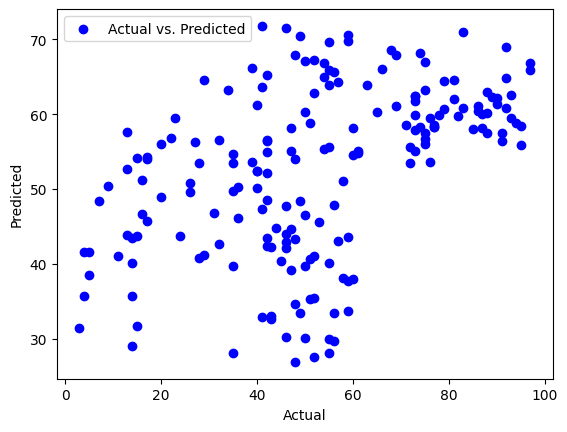

In [ ]:
# As example, y_pred is a result from regression prediction
y_pred = regressor.predict(X_cleaned3)

# Create a scatterplot between actual and prediction data
plt.scatter(y_cleaned3, y_pred, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()